# Homework 1: Finding Similar Items: Textually Similar Documents 

#### Team Members: Noel Karlsson Johansson, Alexander Olsson

#### Dataset
https://www.kaggle.com/competitions/whats-cooking-kernels-only

In [1]:
from classes import *
from utils import *

In [32]:
# ___ DATA PIPELINE ___
SETTINGS = {
    'n_documents': 250,  # Max number of documents = 17 
    'file_path': 'C:/Github/ID2222/data/',
    'file_name': 'recipes.json'
}

data_pipeline = DataPipeline(SETTINGS)
df_documents = data_pipeline.df_documents
df_documents.head()

,doc_id,document_text
0,10259,romaine lettuce black olives grape tomatoes ga...
1,25693,plain flour ground pepper salt tomatoes ground...
2,20130,eggs pepper salt mayonaise cooking oil green c...
3,22213,water vegetable oil wheat salt
4,13162,black pepper shallots cornflour cayenne pepper...


In [3]:
print('Number of documents: ', len(df_documents))

Number of documents:  250


## Shingling

In [4]:
# ___ SHINGLING ___
k = 2
shingling_obj = Shingling(k)                   # Create shingling object with k value 
shingling_vectors = shingling_obj(df_documents)    # Create shingling vectors

### Compare Sets

In [5]:
# ___ JACCARD SIMILARITY (CompareSets) ___
compare_sets = CompareSets()
df_jaccard = compare_sets(shingling_vectors)        # Calculate Jaccard similarity, store in dataframe

In [6]:
df_jaccard

,document1,document2,value
0,0,1,0.327731
1,0,2,0.343750
2,0,3,0.135417
3,0,4,0.333333
4,0,5,0.234848
...,...,...,...
31120,246,248,0.194245
31121,246,249,0.350318
31122,247,248,0.205357
31123,247,249,0.274648


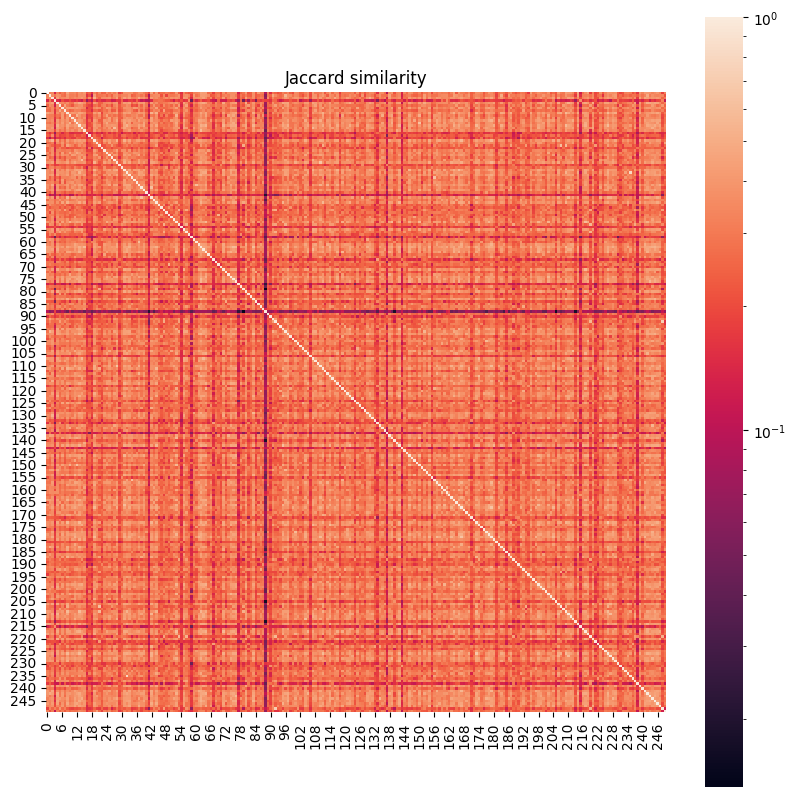

In [7]:
heat_map(df_jaccard, 'Jaccard similarity', 'C:/Github/ID2222/assets/', n = 250)

## MinHashing

In [8]:
n = 125
seed = 42
minhashing_obj = MinHashing(signature_size=n, seed=seed)
minhash_signatures= minhashing_obj(shingling_vectors)   

### Compare Sets

In [9]:
compare_signatures = CompareSignatures()
compare_signatures = compare_signatures(minhash_signatures)
compare_signatures

,document1,document2,value
0,0,1,0.416
1,0,2,0.368
2,0,3,0.112
3,0,4,0.328
4,0,5,0.296
...,...,...,...
31120,246,248,0.152
31121,246,249,0.352
31122,247,248,0.232
31123,247,249,0.312


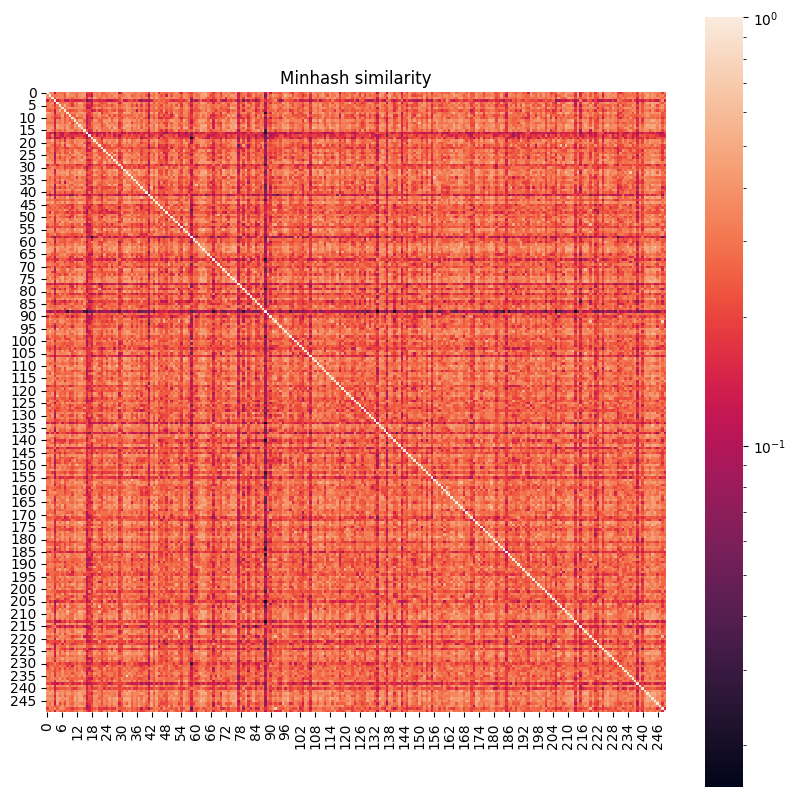

In [10]:
heat_map(compare_signatures, 'Minhash similarity', 'C:/Github/ID2222/assets/', n = 250)

## LSH

In [25]:
num_bands = 5       # Number of bands (sub-vectors) to divide a signature into
num_buckets = 25
band_size = int(n / num_bands)
threshold = (1/num_bands)**(1/band_size)
lsh_obj = LSH(signature_size=n, num_bands=num_bands, num_buckets=num_buckets)
df_candidate_pairs = lsh_obj(minhash_signatures)
df_candidate_pairs

,id,candidates
0,0,"[0, 6, 12, 15, 19, 41, 50, 71, 77, 85, 87, 89,..."
1,1,"[1, 7, 8, 22, 24, 36, 62, 64, 66, 74, 77, 78, ..."
2,2,"[2, 3, 10, 13, 20, 24, 26, 29, 34, 35, 37, 40,..."
3,3,"[2, 3, 4, 5, 13, 16, 32, 36, 42, 44, 45, 56, 5..."
4,4,"[3, 4, 9, 17, 30, 40, 42, 69, 70, 75, 76, 85, ..."
...,...,...
245,245,"[1, 3, 16, 18, 22, 27, 28, 29, 32, 33, 40, 97,..."
246,246,"[0, 2, 13, 19, 24, 29, 32, 35, 37, 42, 44, 47,..."
247,247,"[8, 11, 13, 37, 41, 42, 43, 46, 48, 50, 51, 58..."
248,248,"[3, 4, 5, 8, 10, 13, 17, 19, 20, 26, 32, 36, 3..."


In [26]:
# Combine candidate pairs from LSH with df_documents text
pairs = pd.merge(df_documents, df_candidate_pairs, left_index=True, right_index=True)
pairs

,doc_id,document_text,id,candidates
0,10259,romaine lettuce black olives grape tomatoes ga...,0,"[0, 6, 12, 15, 19, 41, 50, 71, 77, 85, 87, 89,..."
1,25693,plain flour ground pepper salt tomatoes ground...,1,"[1, 7, 8, 22, 24, 36, 62, 64, 66, 74, 77, 78, ..."
2,20130,eggs pepper salt mayonaise cooking oil green c...,2,"[2, 3, 10, 13, 20, 24, 26, 29, 34, 35, 37, 40,..."
3,22213,water vegetable oil wheat salt,3,"[2, 3, 4, 5, 13, 16, 32, 36, 42, 44, 45, 56, 5..."
4,13162,black pepper shallots cornflour cayenne pepper...,4,"[3, 4, 9, 17, 30, 40, 42, 69, 70, 75, 76, 85, ..."
...,...,...,...,...
245,23147,tumeric fresh coriander paprika garlic puree g...,245,"[1, 3, 16, 18, 22, 27, 28, 29, 32, 33, 40, 97,..."
246,44020,pickled jalapeno peppers water romaine lettuce...,246,"[0, 2, 13, 19, 24, 29, 32, 35, 37, 42, 44, 47,..."
247,3245,white vinegar reduced sodium soy sauce kosher ...,247,"[8, 11, 13, 37, 41, 42, 43, 46, 48, 50, 51, 58..."
248,40403,baking powder milk salt flour sugar vegetable ...,248,"[3, 4, 5, 8, 10, 13, 17, 19, 20, 26, 32, 36, 3..."


## Evaluation

We used the following class for evaluating the execution time of our algorithms.

In [27]:
eval = Evaluation(k, n, seed, num_bands, num_buckets, SETTINGS, LSH = True)
elapsed_time = eval(df_documents=df_documents)
print('Elapsed time: ', elapsed_time)

### Evaluation on the candidate pairs

In [28]:
candidate_eval = candit_eval()
similar_docs = candidate_eval(df_candidate_pairs, shingling_vectors)

### S-Curve for LSH candidates

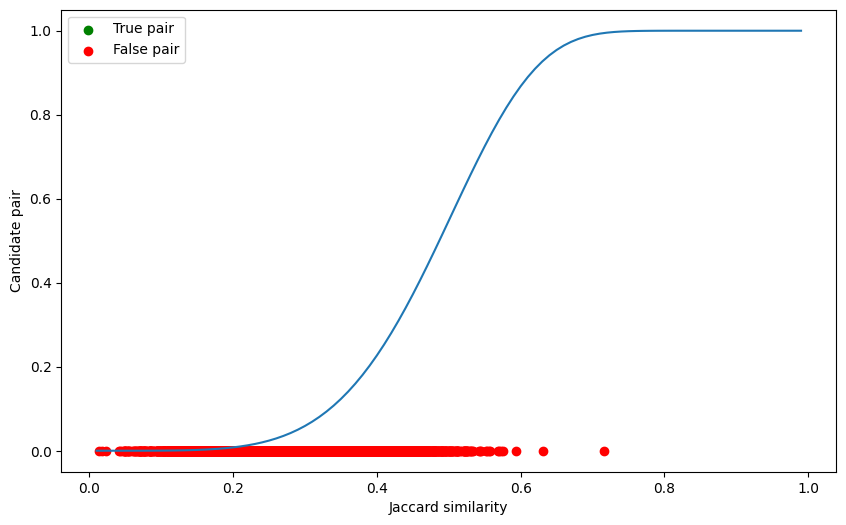

In [29]:
threshold = threshold
true_pair = similar_docs[similar_docs['jaccard_similarity'] >= threshold]
false_pair = similar_docs[similar_docs['jaccard_similarity'] < threshold]

# Plot candidates true/false [0,1] vs jaccard similarity
# plot a curve p = 1 - (1 - s^b)^r
s = [i/100 for i in range(1, 100)]
b = num_bands
r = num_buckets
plt.figure(figsize=(10, 6))
plt.scatter(true_pair['jaccard_similarity'], [1 for _ in range(len(true_pair.index))], color='green', label='True pair')
plt.scatter(false_pair['jaccard_similarity'], [0 for _ in range(len(false_pair.index))], color='red', label='False pair')
plt.plot(s, [1 - (1 - s**b)**r for s in s])
plt.xlabel('Jaccard similarity')
plt.ylabel('Candidate pair')
plt.legend()
plt.show()

### Execution time

![LSH execution time](/results/evaluation_times_lsh.png)
![non-LSH execution time](/results/evaluation_times.png)